In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('House_data.csv')

In [3]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,3.130000e+05
1,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2.384000e+06
2,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,3.420000e+05
3,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4.200000e+05
4,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5.500000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3.081667e+05
4596,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,5.343333e+05
4597,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4.169042e+05
4598,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,2.034000e+05


In [4]:
df.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
price            0
dtype: int64

# Pre-Processing 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('price', axis =1).values
y= df.price.values

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

# Standarizing Data

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Regression

In [9]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor

In [10]:
regression = RandomForestRegressor(n_estimators=20, random_state=0)
regression.fit(X_train,y_train)
y_pred = regression.predict(X_test)

In [11]:
print(regression.score(X_train, y_train))

0.9155178953997056


# Logistic Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg=LinearRegression()

In [14]:
reg.fit(X_train,y_train)

LinearRegression()

In [15]:
pred=reg.predict(X_test)

In [16]:
print(reg.score(X_train,y_train))

0.5498144575612272


# XGBoost Regression

In [17]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [18]:
pd=xgb_reg.predict(X_test)

In [19]:
print(xgb_reg.score(X_train,y_train))

0.9541697654078549


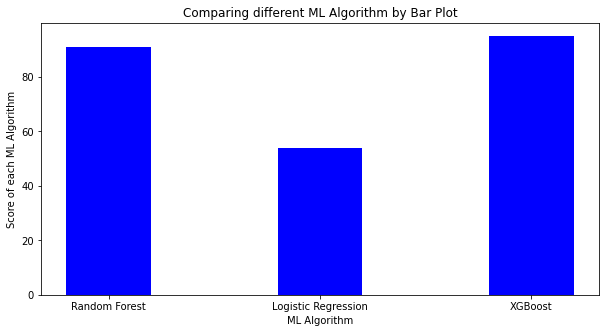

In [24]:
import matplotlib.pyplot as plt
data = {'Random Forest':91, 'Logistic Regression':54, 'XGBoost':95}
score = list(data.keys())
Algorithm = list(data.values())
  
fig = plt.figure(figsize = (10, 5))

plt.bar(score, Algorithm, color ='blue',
        width = 0.4)
 
plt.xlabel("ML Algorithm")
plt.ylabel("Score of each ML Algorithm")
plt.title("Comparing different ML Algorithm by Bar Plot")
plt.show()